In [1]:
import numpy as np
import matplotlib.pyplot as plt

import itertools
import math

from SOBI import *

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
import scipy as sp
from scipy import signal

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal

irregular_time = [0]
for _ in time[1:]:
    irregular_time.append(irregular_time[-1] + np.random.randint(5) + 1)
    
irregular_time = np.array(irregular_time) / n_samples * 8

s2 = np.sign(np.sin(3 * irregular_time))  # Signal 2 : square signal

irregular_time = [0]
for _ in time[1:]:
    irregular_time.append(irregular_time[-1] + np.random.randint(5) + 1)
    
irregular_time = np.array(irregular_time) / n_samples * 8

s3 = signal.sawtooth(2 * np.pi * irregular_time)  # Signal 3: saw tooth signal
s4 = np.arange(-1, 1, 2/n_samples)

S = np.c_[s1, s2, s3, s4]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise

S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1, 1], [0.5, 2, 1.0, 0.5], [1.5, 1.0, 2.0, 1.5], [-0.5, 1, 0.2, 0.5]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

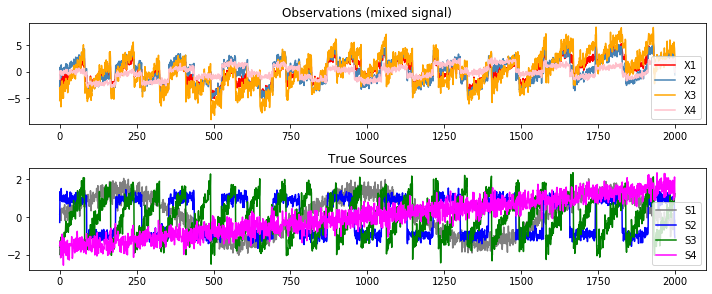

In [3]:
plt.figure(figsize=(10, 8))
labels = ['X1', 'X2', 'X3', 'X4']

model = X
name = 'Observations (mixed signal)'
colors = ['red', 'steelblue', 'orange', 'pink']
plt.subplot(4, 1, 1)
plt.title(name)
for sig, color, label in zip(model.T, colors, labels):
    plt.plot(sig, color=color, label=label)
plt.legend()
    
labels = ['S1', 'S2', 'S3', 'S4']

model = S
name = 'True Sources'
colors = ['grey', 'blue', 'green', 'magenta']
plt.subplot(4, 1, 2)
plt.title(name)
for sig, color, label in zip(model.T, colors, labels):
    plt.plot(sig, color=color, label=label)
plt.legend()

plt.tight_layout()
plt.show()

We use the joint diagonalization method presented in 

Jacobi angles for simultaneous diagonalization, Cardoso, Jean-François and Souloumiac, Antoine, SIAM journal on matrix analysis and applications, 1996

In [4]:
ica = SOBI(lags=10, eps=1e-3, max_iter=1000)
ica.fit(X)

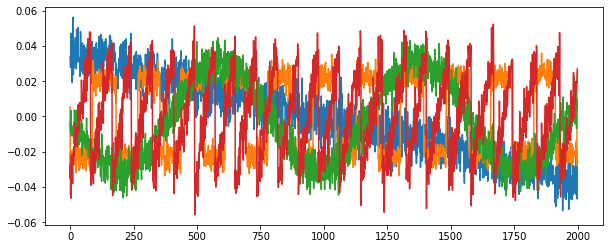

In [5]:
plt.figure(figsize=(10, 4));
plt.plot(ica.transform(X))

The components are identified

##### Remark

For the set of matrices to be perfectly jointly diagonalized, they must commute. Yet, almost commuting matrices are alsmot jointly diagonalizable. 

https://arxiv.org/pdf/1307.6549.pdf

In [7]:
X_white, U, d = whitening(X.T)
C = time_lagged_autocov(X_white, 20)

all_test = []

for c_1 in C:
    for c_2 in C:
        all_test.append(np.real(((np.matmul(c_1, c_2) - np.matmul(c_2, c_1))**2).sum()))

(array([149.,  94.,  68.,  48.,  30.,  18.,  14.,   8.,   2.,  10.]),
 array([0.00000000e+00, 2.89701283e-05, 5.79402565e-05, 8.69103848e-05,
        1.15880513e-04, 1.44850641e-04, 1.73820770e-04, 2.02790898e-04,
        2.31761026e-04, 2.60731154e-04, 2.89701283e-04]),
 <a list of 10 Patch objects>)

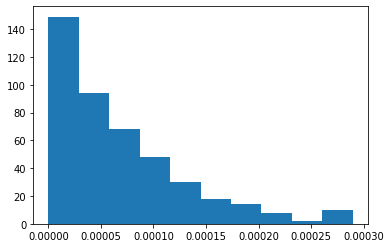

In [8]:
plt.hist(all_test)

They almost commute...